In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
def create_pairplot(df):
    '''
    all df columns should be counts, no NAME column

    print(m2.head(2))
       COUNT-A  COUNT-J  COUNT-L
    0       23       21       29
    1        6        2        4
    '''
    g = sns.pairplot(df)
    
    # Add correlation coefficients to the upper triangle
    for i, row in enumerate(df.columns):
        for j, col in enumerate(df.columns):
            if i < j:  # Upper triangle
                # Calculate correlation
                corr = df[row].corr(df[col])
                
                # Add text annotation to the pairplot
                ax = g.axes[i, j]
                ax.annotate('corr: ' + f'{corr:.2f}', 
                            xy=(0.2, 0.9), 
                            xycoords='axes fraction',
                            ha='center', va='center', fontsize=10, color='red')
            if i == j:  # diagnal
                # Calculate correlation
                total = sum(df[row])
                
                # Add text annotation to the pairplot
                ax = g.axes[i, j]
                ax.annotate("total count: " + f'{total}', 
                            xy=(0.3, 0.9), 
                            xycoords='axes fraction',
                            ha='center', va='center', fontsize=10, color='black')
    return(g)

In [3]:
def create_corr_heatmap(df):
    '''
    all df columns should be counts, no NAME column

    print(m2.head(2))
       COUNT-A  COUNT-J  COUNT-L
    0       23       21       29
    1        6        2        4
    '''
    corr_matrix =  df.corr(method='pearson') # {‘pearson’, ‘kendall’, ‘spearman’} 
    g = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap')
    return (g)

In [4]:
df1 = pd.read_csv("../../ashley/res/count.label.csv", index_col=0)
df2 = pd.read_csv("../../john/res/count.label.csv" , index_col=0)
df3 = pd.read_csv("../../logan/res/count.label.csv", index_col=0)

In [5]:
print(df1.head(2), "\n", df2.head(2), "\n", df3.head(2))

                                                NAME  COUNT
0   point5unitsEpo_4-Stitching-12.2.label.npy.gz.log     23
1  point0625unitsEpo_4-Stitching-24.1.label.npy.g...      6 
                                                 NAME  COUNT
0   point5unitsEpo_4-Stitching-12.2.label.npy.gz.log     21
1  point0625unitsEpo_4-Stitching-24.1.label.npy.g...      2 
                                                 NAME  COUNT
0   point5unitsEpo_4-Stitching-12.2.label.npy.gz.log     29
1  point0625unitsEpo_4-Stitching-24.1.label.npy.g...      4


In [6]:
print(df1.shape, df2.shape, df3.shape)

(80, 2) (96, 2) (96, 2)


In [7]:
df1 = df1.rename(columns={'COUNT': 'COUNT-A'})
df2 = df2.rename(columns={'COUNT': 'COUNT-J'})
df3 = df3.rename(columns={'COUNT': 'COUNT-L'})
print(df1.head(2), "\n", df2.head(2), "\n", df3.head(2))

                                                NAME  COUNT-A
0   point5unitsEpo_4-Stitching-12.2.label.npy.gz.log       23
1  point0625unitsEpo_4-Stitching-24.1.label.npy.g...        6 
                                                 NAME  COUNT-J
0   point5unitsEpo_4-Stitching-12.2.label.npy.gz.log       21
1  point0625unitsEpo_4-Stitching-24.1.label.npy.g...        2 
                                                 NAME  COUNT-L
0   point5unitsEpo_4-Stitching-12.2.label.npy.gz.log       29
1  point0625unitsEpo_4-Stitching-24.1.label.npy.g...        4


In [8]:
dfs = [df1, df2, df3] 

m = reduce(lambda left, right: pd.merge(left, right, on='NAME', how='inner'), dfs)

print(m.shape)
m.head(2)

(80, 4)


,NAME,COUNT-A,COUNT-J,COUNT-L
0,point5unitsEpo_4-Stitching-12.2.label.npy.gz.log,23,21,29
1,point0625unitsEpo_4-Stitching-24.1.label.npy.g...,6,2,4


In [9]:
def get_epo_concentration(name):
    if '1unitEpo' in name:
        return 1.0
    elif 'point5unitsEpo' in name:
        return 0.5
    elif 'point25unitsEpo' in name:
        return 0.25
    elif 'point125unitsEpo' in name:
        return 0.125
    elif 'point0625unitsEpo' in name:
        return 0.0625
    elif 'NoEpo' in name:
        return 0.0
    else:
        print(name, 'has no known Epo concentration')
        return None  # If no concentration found

In [10]:
def get_replicate(label):
    if 'Epo_1' in label:
        return '1'
    elif 'Epo_2' in label:
        return '2'
    elif 'Epo_3' in label:
        return '3'
    elif 'Epo_4' in label:
        return '4'

In [11]:
def get_sceneIndex(name):
    if '.0' in name:
        return '0'
    elif '.1' in name:
        return '1'
    elif '.2' in name:
        return '2'
    elif '.3' in name:
        return '3' 

In [12]:
m['Epo'] = m['NAME'].apply(get_epo_concentration)
m['replicate'] = m['NAME'].apply(get_replicate)
m['sceneIndex'] = m['NAME'].apply(get_sceneIndex)

In [13]:
m.to_csv("count_scene_level.csv", index = 0)
m.head()

,NAME,COUNT-A,COUNT-J,COUNT-L,Epo,replicate,sceneIndex
0,point5unitsEpo_4-Stitching-12.2.label.npy.gz.log,23,21,29,0.5000,4,2
1,point0625unitsEpo_4-Stitching-24.1.label.npy.g...,6,2,4,0.0625,4,1
2,point5unitsEpo_1-Stitching-09.1.label.npy.gz.log,23,28,21,0.5000,1,1
3,point125unitsEpo_2-Stitching-18.1.label.npy.gz...,15,8,5,0.1250,2,1
4,point125unitsEpo_3-Stitching-19.0.label.npy.gz...,7,2,3,0.1250,3,0


In [14]:
m_plate_level = m.groupby(['Epo', 'replicate'])[['COUNT-A', 'COUNT-J', 'COUNT-L']].sum().reset_index()
m_plate_level.to_csv("count_plate_level.csv", index=0)
print(m_plate_level.shape)
m_plate_level.head()

(21, 5)


,Epo,replicate,COUNT-A,COUNT-J,COUNT-L
0,0.0000,3,0,0,0
1,0.0625,1,45,16,25
2,0.0625,2,48,11,20
3,0.0625,3,42,18,15
4,0.0625,4,73,23,45


In [15]:
m2 = m.iloc[:,1:4]
print(m2.shape)
print(m2.head())

(80, 3)
   COUNT-A  COUNT-J  COUNT-L
0       23       21       29
1        6        2        4
2       23       28       21
3       15        8        5
4        7        2        3


In [16]:
m3 = m_plate_level.iloc[:, 2:5]
print(m3.shape)
print(m3.head())

(21, 3)
   COUNT-A  COUNT-J  COUNT-L
0        0        0        0
1       45       16       25
2       48       11       20
3       42       18       15
4       73       23       45


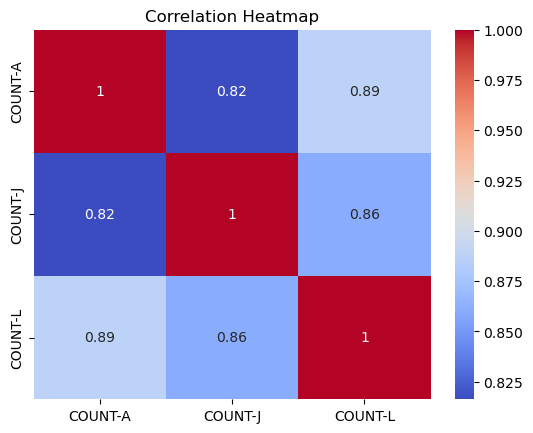

In [17]:
corr_heatmap2 = create_corr_heatmap(m2)
corr_heatmap2.figure.savefig('corr_heatmap.scene_level.pdf')

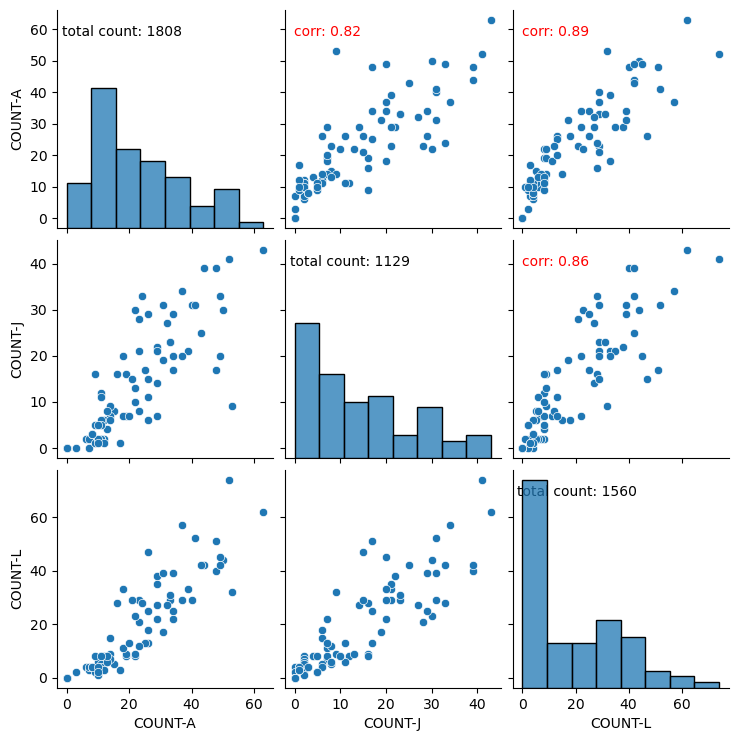

In [18]:
pairplot2 = create_pairplot(m2)
pairplot2.fig.savefig('pairplot.scene_level.pdf')

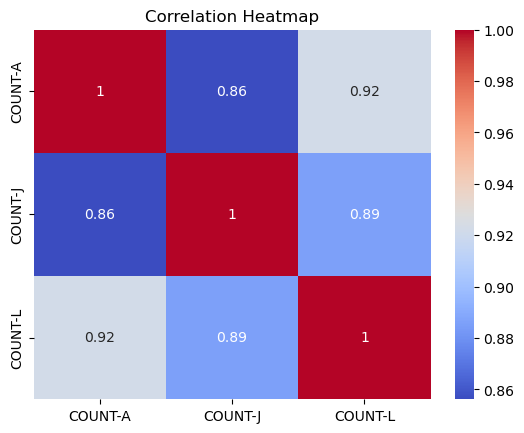

In [19]:
corr_heatmap3 = create_corr_heatmap(m3)
corr_heatmap3.figure.savefig('corr_heatmap.plate_level.pdf')

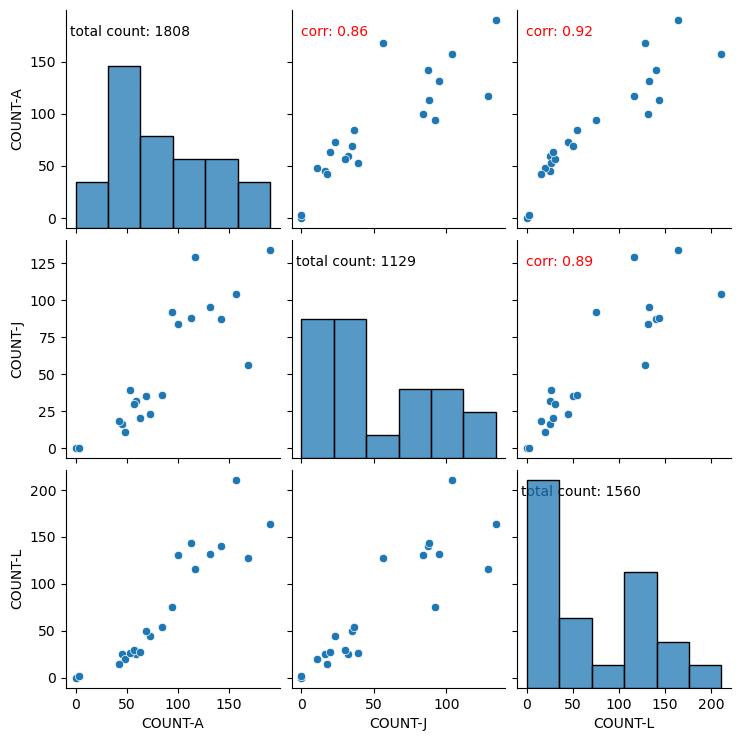

In [20]:
pairplot3 = create_pairplot(m3)
pairplot3.fig.savefig('pairplot.plate_level.pdf')

In [23]:
from IPython.display import display, Javascript
import os
os.system('jupyter nbconvert --to html "EpoCurveAndCorrelation.ipynb"')

[NbConvertApp] Converting notebook EpoCurveAndCorrelation.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 560425 bytes to EpoCurveAndCorrelation.html


0

In [78]:
plate_level_melt = m_plate_level.melt(
    id_vars=['Epo', 'replicate'], 
    value_vars=['COUNT-A', 'COUNT-J', 'COUNT-L'], 
    var_name='Count_Type', value_name='Count')

print(m_plate_level.shape)
plate_level_melt.to_csv('count_plate_level_melt.csv', index=0)
plate_level_melt

(21, 5)


,Epo,replicate,Count_Type,Count
0,0.0000,3,COUNT-A,0
1,0.0625,1,COUNT-A,45
2,0.0625,2,COUNT-A,48
3,0.0625,3,COUNT-A,42
4,0.0625,4,COUNT-A,73
...,...,...,...,...
58,0.5000,4,COUNT-L,132
59,1.0000,1,COUNT-L,211
60,1.0000,2,COUNT-L,131
61,1.0000,3,COUNT-L,143


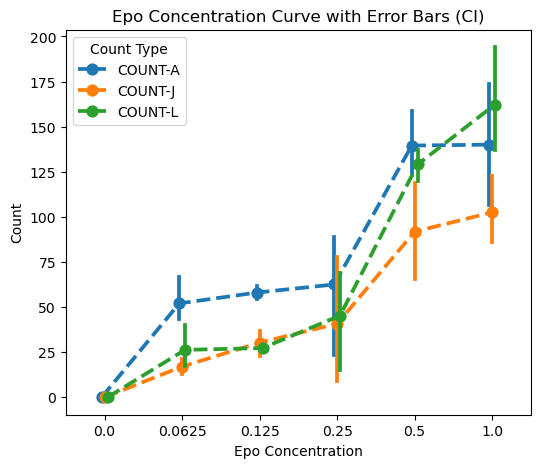

In [74]:
def create_epo_curve(df_melted):
    '''
    df_melted example:
    
          Epo replicate Count_Type  Count
    0   0.0000         3    COUNT-A      0
    1   0.0625         1    COUNT-A     45
    2   0.0625         2    COUNT-A     48
    3   0.0625         3    COUNT-A     42
    4   0.0625         4    COUNT-A     73
    ..     ...       ...        ...    ...
    58  0.5000         4    COUNT-L    132
    59  1.0000         1    COUNT-L    211
    60  1.0000         2    COUNT-L    131
    61  1.0000         3    COUNT-L    143
    62  1.0000         4    COUNT-L    164
    
    [63 rows x 4 columns]
    '''
    plt.figure(figsize=(6, 5))
    
    pointplot = sns.pointplot(
        data=df_melted, 
        x='Epo', y='Count', 
        hue='Count_Type', 
        dodge=True, 
        markers='o', 
        linestyles='--',  # -  --  :  -.
        errorbar='ci'  # se, sd, ci, pi
    )
    
    plt.title('Epo Concentration Curve with Error Bars (CI)')
    plt.xlabel('Epo Concentration')
    plt.ylabel('Count')
    plt.legend(title='Count Type', loc='best')
    
    return (pointplot)

pointplot_plate_level = create_epo_curve(plate_level_melt)
pointplot_plate_level.figure.savefig('epo_curve.plate_level.pdf')  # Save to PDF

In [76]:
print(plate_level_melt)

       Epo replicate Count_Type  Count
0   0.0000         3    COUNT-A      0
1   0.0625         1    COUNT-A     45
2   0.0625         2    COUNT-A     48
3   0.0625         3    COUNT-A     42
4   0.0625         4    COUNT-A     73
..     ...       ...        ...    ...
58  0.5000         4    COUNT-L    132
59  1.0000         1    COUNT-L    211
60  1.0000         2    COUNT-L    131
61  1.0000         3    COUNT-L    143
62  1.0000         4    COUNT-L    164

[63 rows x 4 columns]
